#### 뉴스 카테고리 분류 모델


[1] 데이터 불러오기 + 합치기<hr>

In [2]:
import pandas as pd
import re
import numpy as np

In [3]:
# 불필요한 컬럼 제외하고 가져오기
eduDF=pd.DataFrame()
envDF=pd.DataFrame()
foodDF=pd.DataFrame()
df_list=[eduDF, envDF, foodDF]
FILE_LIST=['./data/all_0.csv', './data/all_1.csv', './data/all_2.csv']


def make_kor(file, count):
    filterDF=pd.DataFrame()
    dataDF=pd.read_csv(file)         # 파일 읽기
    all=[]
    for text in dataDF['text']:
        a= re.sub('[^ㄱ-ㅎ가-힣.]+',' ',text)         #한글만 남겨놓기
        all.append(a)
    filterDF['text']=all
    filterDF['label']=count
    return filterDF

In [4]:
edu=make_kor('./all_0.csv',0)
env=make_kor('./all_1.csv',1)
food=make_kor('./all_2.csv',2)

edu.info(), env.info(), food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1785 non-null   object
 1   label   1785 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1723 non-null   object
 1   label   1723 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1771 non-null   object
 1   label   1771 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.8+ KB


(None, None, None)

In [6]:
newsDF=pd.concat([edu, env, food])
newsDF['label'].value_counts()

label
0    1785
2    1771
1    1723
Name: count, dtype: int64

[2] 데이터 토큰화 및 불용어 제거 후 단어사전 생성<hr>

In [7]:
from konlpy.tag import Okt
from collections import Counter
from NLPfunc import *

In [ ]:
# 학습, 테스트 분리 후 DS
newsDF=newsDF.reset_index(drop=True)
trainDF=newsDF.sample(frac=0.9, random_state=100)
testDF=newsDF.drop(trainDF.index)
print(trainDF.index)


# 토큰화 인스턴스 생성성
okt=Okt()

Index([1639, 4204, 3264,  664, 1039,  640, 3765, 2047, 1575,  995,
       ...
       5102, 3799, 2791,  745, 2544, 3981, 4447, 2177, 3110, 3035],
      dtype='int64', length=4751)


In [10]:
testDF['label'].value_counts(), trainDF['label'].value_counts()

(label
 1    182
 0    174
 2    172
 Name: count, dtype: int64,
 label
 0    1611
 2    1599
 1    1541
 Name: count, dtype: int64)

In [11]:
## 불용어 리스트 불러오는 함수
STOP_PATH = 'kor_stopwords.txt'


stopwords = make_stopwords(STOP_PATH)

In [12]:
# 토큰화 및 단어사전 생성
train_vocab= make_vocab(data=trainDF['text'], tag=okt, stopwords=stopwords, vocab_num=10000)

print(len(train_vocab))

9746


In [13]:
# 불용어 제거
t_vocab=train_vocab.copy()
for key, v in t_vocab.items():
    if key in stopwords:
        a= train_vocab.pop(key)

In [14]:
train_vocab.items()

dict_items([('<PAD>', 0), ('<UNK>', 1), ('.', 2), ('할', 3), ('서울', 4), ('명', 5), ('기자', 6), ('의료', 7), ('한다', 8), ('지역', 9), ('제공', 10), ('연합뉴스', 11), ('학생', 12), ('교육', 13), ('위', 14), ('정부', 15), ('전', 16), ('며', 17), ('사진', 18), ('지난', 19), ('병원', 20), ('학교', 21), ('됐다', 22), ('의대', 23), ('원', 24), ('시', 25), ('대한', 26), ('성', 27), ('사업', 28), ('지원', 29), ('대학', 30), ('밝혔다', 31), ('환자', 32), ('환경', 33), ('정원', 34), ('뉴스', 35), ('한국', 36), ('교사', 37), ('장', 38), ('의원', 39), ('확대', 40), ('회', 41), ('통해', 42), ('해야', 43), ('발생', 44), ('금지', 45), ('관리', 46), ('운영', 47), ('관련', 48), ('계획', 49), ('뉴시스', 50), ('문제', 51), ('전국', 52), ('위원회', 53), ('나눔', 54), ('날', 55), ('진행', 56), ('정책', 57), ('되는', 58), ('교육청', 59), ('의사', 60), ('경우', 61), ('교수', 62), ('올해', 63), ('비', 64), ('오후', 65), ('사회', 66), ('서', 67), ('따르면', 68), ('고딕', 69), ('연', 70), ('하기', 71), ('건', 72), ('조', 73), ('더', 74), ('재판매', 75), ('보다', 76), ('기관', 77), ('센터', 78), ('결과', 79), ('건강', 80), ('계', 81), ('간', 82), ('대상', 8

In [15]:
# 문장 벡터화
trainVec=vectorize(vocab=train_vocab, DF=trainDF, tokenizer=okt)
testVec=vectorize(vocab=train_vocab, DF=testDF, tokenizer=okt)

In [16]:
# 행당 길이 시각화
len_list=[]
for t in trainVec['text']:
    len_list.append(len(t))
    print(len(t))

354
179
56
3
466
527
302
446
704
296
677
98
525
265
112
831
304
307
3
407
487
269
422
325
197
286
563
35
284
289
396
103
956
103
339
146
222
639
40
81
599
535
309
458
98
485
85
31
636
70
376
235
427
477
391
35
62
896
687
372
751
639
1609
671
925
71
37
958
602
79
548
360
284
501
52
149
3
79
162
372
247
355
418
187
458
251
359
354
662
3
364
195
359
43
624
406
872
26
605
316
516
257
220
424
163
297
346
40
57
802
32
243
352
402
257
364
781
151
291
161
361
381
60
81
374
412
43
700
249
255
275
348
323
353
1740
423
259
112
433
668
318
706
292
157
944
243
46
302
3
29
117
831
38
643
28
997
368
585
340
587
84
559
113
681
153
662
577
177
231
744
862
453
318
160
274
658
1110
567
302
258
253
410
375
951
727
45
3
400
208
266
376
422
907
142
38
792
389
337
94
415
248
291
263
60
278
450
583
84
368
43
101
279
430
811
304
470
362
495
392
1038
321
3
278
323
556
377
390
249
423
51
288
383
359
38
645
289
712
475
1134
309
146
40
1251
323
365
669
1299
229
577
64
329
540
278
371
468
306
759
505
356
426
89
236

((array([1.341e+03, 1.535e+03, 9.760e+02, 4.520e+02, 2.180e+02, 1.180e+02,
         4.500e+01, 3.200e+01, 1.400e+01, 7.000e+00, 2.000e+00, 5.000e+00,
         2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00]),
  array([   0.,  192.,  384.,  576.,  768.,  960., 1152., 1344., 1536.,
         1728., 1920., 2112., 2304., 2496., 2688., 2880., 3072., 3264.,
         3456., 3648., 3840.]),
  <BarContainer object of 20 artists>),
 378.59208587665756,
 330.0)

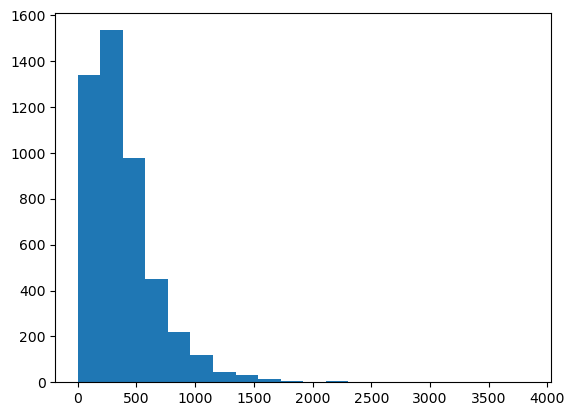

In [20]:
plt.hist(len_list, bins=20), np.mean(len_list), np.median(len_list)

In [18]:
train_pad=padding(length=310, textList=trainVec['text'])
trainPad=trainVec.copy()
trainPad['text']=train_pad
test_pad= padding(length=310, textList=testVec['text'])
testPad=testVec.copy()
testPad['text']=test_pad

[3] 모델 설계 및 훈련 진행<hr>
- 라벨: 3개 (분류)
- 알고리즘: rnn/ lstm
- 0:교육, 1:환경, 2:의료/식품

In [ ]:
class TextDataset(Dataset):
    def __init__(self, feature, label):
        super().__init__()
        self.feature= feature
        self.label= label
        self.length=feature.shape[0]

    
    def __len__(self):
        return self.length

    def __getitem__(self, index):
        return self.feature[index], self.label[index]

In [19]:
# 데이터셋, 데이터로더 생성
import torch

train_tensor=torch.tensor(train_pad)
train_label= torch.FloatTensor(trainVec['label'].values).long()

test_tensor=torch.tensor(test_pad)
test_label= torch.FloatTensor(testVec['label'].values).long()

trainDS=TextDataset(train_tensor, train_label)
testDS= TextDataset(test_tensor, test_label)

trainDL=DataLoader(trainDS, batch_size=50)
testDL=DataLoader(testDS, batch_size=50)


In [20]:
# 데이터로더 확인
for f, t in trainDL:
    print(f.shape)
    break

torch.Size([50, 310])


In [21]:
import torch.nn as nn
from typing import Literal
from torch import optim
import os


In [22]:
# 커스텀 모델 및 파라미터 설정

# 모델 파라미터
n_vocab= len(train_vocab)
hidden_dim= 64
embedding_dim= 128
n_layers= 2
device= 'cuda' if torch.cuda.is_available() else 'cpu'

# 커스텀 모델 생성
classifier= textCLF(
    n_vocab=n_vocab, hidden_dim=hidden_dim, 
    embedding_dim=embedding_dim, n_layers=n_layers, model_type='lstm'
).to(device)

# 최적화 설정
optimizer= optim.Adam(classifier.parameters(), lr=0.01)

# 모델 저장 위치 지정
SAVE_PATH='./model_final/'
SAVE_FILE='newsclf_all.pth'
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

In [ ]:
from get_model import Custom_model
from torchmetrics.classification import F1Score, MulticlassF1Score, Accuracy
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics.regression import R2Score, MeanSquaredError
import torch
import matplotlib.pyplot as plt
from typing import Literal
import pandas as pd
import torch.optim.lr_scheduler as lr_scheduler
import pickle
from get_train_model import *
import pickle

In [25]:
LOSS_HISTORY, SCORE_HISTORY, ep= model_training(model= classifier, trainDL=trainDL,
                                            testDL=testDL, optimizer=optimizer,
                                            epoch=50, LIMIT=5, SAVE_PATH=SAVE_PATH,
                                            SAVE_FILE=SAVE_FILE, numcls=3,
                                            break_param='score', save_type='all',
                                            type='muticlass', optim_type='score', device=device)


1/50
Train
 Loss: 0.9224241286961
 Score: 0.5045748543161065
Val
 Loss: 0.7508728221058846
 Score: 0.5950450479984284
2/50
Train
 Loss: 0.6216528872166996
 Score: 0.7209294438362122
Val
 Loss: 0.35592781361192466
 Score: 0.8837297260761261
3/50
Train
 Loss: 0.3319383626108739
 Score: 0.9006671151563302
Val
 Loss: 0.2851125918328762
 Score: 0.9250990947087606
4/50
Train
 Loss: 0.26899452649279315
 Score: 0.9228335581163862
Val
 Loss: 0.2724734286467234
 Score: 0.9230991005897522
5/50
Train
 Loss: 0.23787869272558992
 Score: 0.9334328336947
Val
 Loss: 0.283258285621802
 Score: 0.9230991025765737
6/50
Train
 Loss: 0.222122294675392
 Score: 0.9381705079950503
Val
 Loss: 0.26112981997430323
 Score: 0.9237657686074575
7/50
Train
 Loss: 0.20476721271650114
 Score: 0.9430574372188368
Val
 Loss: 0.2563059389280776
 Score: 0.9321981946627299
8/50
Train
 Loss: 0.19325227644850515
 Score: 0.9463048379367857
Val
 Loss: 0.27479255869984626
 Score: 0.9257657667001088
9/50
Train
 Loss: 0.1843635520911

In [26]:
# 단어사전 피클로 저장
with open('vocab.pikle', mode='wb') as f:
    pickle.dump(train_vocab, f)

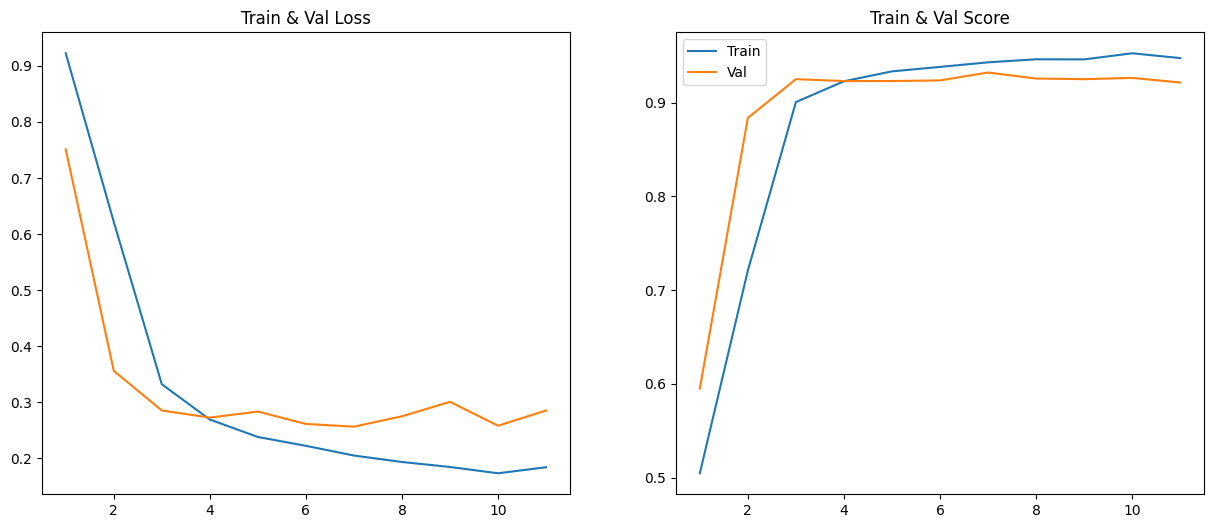

In [27]:
# 시각화
draw_result(EPOCH=ep, LOSS_HISTORY=LOSS_HISTORY, SCORE_HISTORY=SCORE_HISTORY)

In [ ]:
# 검증
PATH='./model8newsclf_all.pth'
text='[제주=뉴시스] 양영전 기자 = 제주도교육청은 오는 12~13일 협재해수욕장과 표선해수욕장에서 2024년 제주바다쓰레기저감실천 캠페인 우리 처음 만난 바다처럼을 운영한다고 11일 밝혔다.'
test_model= torch.load(PATH)
from predict import *
# 한글만 남기고 모두 제거
a= re.sub('[^ㄱ-ㅎ가-힣]+',' ',text)
tokenizer=Okt()
# 토큰화
token_text=tokenizer.morphs(a)

#단어사전을 통한 벡터화
# 단어사전 불러오기
with open('vocab.pikle', 'rb') as f:
    test_vocab=pickle.load(f)
# 벡터화
vec_token= vectorize(vocab=test_vocab, DF=token_text, tokenizer=tokenizer)

# 패딩
vec_token= padding(length=50, text=vec_token)
vec_token=vec_token[0]
token_torch=torch.FloatTensor(vec_token).long()
print(token_torch)

test_model.eval()
with torch.no_grad():

    predict_mcf2(model=test_model, data=token_torch, result=['교육', '환경', '음식'])

In [36]:
from sklearn.metrics import classification_report
# 시도 1 약 90점
model=torch.load('./model_final/try_1.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       507
           1       0.91      0.92      0.91       485
           2       0.89      0.86      0.88       495

    accuracy                           0.90      1487
   macro avg       0.90      0.90      0.90      1487
weighted avg       0.90      0.90      0.90      1487



In [37]:
# 시도 2 
# -> embedding 층 128-> 64
model=torch.load('./model_final/try_2.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       507
           1       0.90      0.92      0.91       485
           2       0.91      0.85      0.88       495

    accuracy                           0.90      1487
   macro avg       0.90      0.90      0.90      1487
weighted avg       0.90      0.90      0.90      1487



In [55]:
# 시도 3
# -> n_layers 2-> 4 
model=torch.load('./model_final/try_3.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 성능 약간 다운

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       507
           1       0.86      0.92      0.89       485
           2       0.90      0.83      0.87       495

    accuracy                           0.89      1487
   macro avg       0.89      0.89      0.89      1487
weighted avg       0.89      0.89      0.89      1487



In [65]:
# 시도 4
# -> h_dim 64 -> 32
model=torch.load('./model_final/try_4.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 처음이랑 거의 비슷

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       507
           1       0.90      0.93      0.91       485
           2       0.89      0.87      0.88       495

    accuracy                           0.91      1487
   macro avg       0.91      0.91      0.91      1487
weighted avg       0.91      0.91      0.91      1487



In [74]:
# 시도 5
# -> lstm -> rnn
model=torch.load('./model_final/try_5.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 진짜 별로네..

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       507
           1       0.45      0.21      0.29       485
           2       0.48      0.61      0.54       495

    accuracy                           0.55      1487
   macro avg       0.53      0.54      0.51      1487
weighted avg       0.53      0.55      0.52      1487



In [176]:
# 최적의 패딩값
# 85 -> 0.91
# 200 -> 0.921
# 367(평균) -> 0.93
# 318(중앙값) -> 0.92
# +++ 패딩값을 늘릴수록 학습이 길어짐..
model=torch.load('./model_final/try_6.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       507
           1       0.90      0.96      0.93       485
           2       0.91      0.89      0.90       495

    accuracy                           0.92      1487
   macro avg       0.92      0.92      0.92      1487
weighted avg       0.92      0.92      0.92      1487



In [ ]:
model=torch.load('./model_final/try_2.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
result_idx=['교육', '환경', '음식/의료']
count=0
for feature, target in testDL:
    count+=1
    a=predict_mcf2(model, feature, result_idx)
    print(a, target)
    if count==5: break